In [18]:
import assignment1 as a1
import utilities as utl
import scipy
import numpy as np
import matplotlib.pyplot as plt

from utilities import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [19]:
(countries, features, values) = a1.load_unicef_data()

targets = values[:,1]
x = values[:,:]
# x = a1.normalize_data(x)

feature=10
N_TRAIN = 100;
x_train = x[0:N_TRAIN, feature]
t_train = targets[0:N_TRAIN]
x_test = x[N_TRAIN:, feature]
t_test = targets[N_TRAIN:]

u = (100, 10000)
s = 2000.0
r = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000)

In [20]:
err_test_count = []
err_train_count = []
for temp_lambda in r:

    sta_pos = [it * 10 for it in range(10)]
    end_pos = [it * 10 for it in range(11)][1:]

    err_test_collection = np.array([0] * 10)
    err_train_collection = np.array([0] * 10)
    
    for idx in xrange(10):
        s1 = sta_pos[idx % 10]
        e1 = end_pos[idx % 10]
        s2 = sta_pos[(idx+1) % 10]
        e2 = end_pos[(idx+1) % 10]
        # print s1, e1, s2, e2
        new_x_train = construct_sigmoid_array(x_train[s1:e1], u, s)
        new_t_train = t_train[s1:e1]
        new_x_test = construct_sigmoid_array(x_test[s2:e2], u, s)
        new_t_test = t_test[s2:e2]
        # with regularization
        w, err_train, err_test =  polynomial_regression_with_regularization( \
                            temp_lambda, new_x_train, new_t_train, new_x_test, new_t_test)
        
        err_test_collection[idx] = err_test
        err_train_collection[idx] = err_train
    err_test_count.append(np.average(err_test_collection))
    err_train_count.append(np.average(err_train_collection))
    print np.average(err_train_collection), np.average(err_test_collection)

23.3 33.8
23.3 33.8
23.4 33.6
25.2 32.6
42.5 40.8
55.6 51.4
57.6 53.0
58.0 53.1
58.0 53.1


In [21]:
r

(0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000)

In [22]:
err_test_count

[33.799999999999997,
 33.799999999999997,
 33.600000000000001,
 32.600000000000001,
 40.799999999999997,
 51.399999999999999,
 53.0,
 53.100000000000001,
 53.100000000000001]

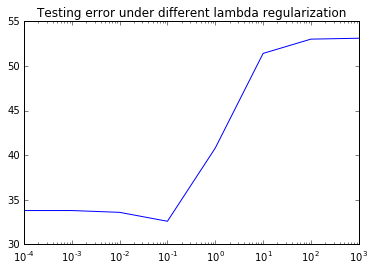

In [23]:
plt.semilogx(r, err_test_count)
plt.title('Testing error under different lambda regularization')
plt.show()